<div id="container" style="position:relative;">
<div style="float:left"><h1> Mahyar Sabouniaghdam</h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

# NLP With Hotel Review Part 1

You will begin with some Exploratory Data Analysis (EDA), and then move into data augmentation, modelling, and iteration over model improvements.

### Exploratory Data Analysis

1. The target column of interest is Reviewer_Score.

   a. What is the shape of the dataset?

   b. The reviews provided are all given as decimal values. Convert them into integers from 1 to 10.

   c. The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like? What is the actual distribution of reviews?

   d. Given this will be a classification problem, what is a potential problem with this distribution?


2. This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?

### Data Wrangling

3. Build the proper dataset separation (Optional but recommended: The dataset is actually too big to run quickly on most laptops. Feel free to sample ~10% of the data as your dataset from this point on. Make sure all classes are included in your subsample.)

   a. Convert the Reviewer_Score column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').
   
   b. Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review.

   c. Split the data into train and test sets.
   
   d. Use a count vectorizer to combine Positive_Review and Negative_Review with the numeric data (notice that this is done AFTER the train/test split). You should vectorize each column separately, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). You may have to adjust the min_df parameter.

   e. What does the min_df parameter do?

# Table of Contents

[Part 1. Exploratory Data Analysis](#Part-1.-Exploratory-Data-Analysis) <br>
- [Loading data & checking high-level details](#Loading-data-&-checking-high-level-details)
- [Question 1](#Question-1)
 - [a](#1a)
 - [b](#1b)
 - [c](#1c)
 - [d](#1d)
- [Question 2](#Question-2)

[Part 2. Data Wrangling](#Part-2.-Data-Wrangling) <br>
- [Question 3](#Question-3) <br>
 - [a](#3a)
 - [b](#3b)
 - [c](#3c)
 - [d](#3d)
 - [e](#3e)



# Part 1. Exploratory Data Analysis

##  Loading data & checking high-level details

In [1]:
# import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors


In [2]:
# loading the data

hotel_df = pd.read_csv('Hotel_Reviews.csv')

In [3]:
# View the dataframe head

hotel_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
# Quickly check the data types

hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [5]:
hotel_df.duplicated().sum()

526

In [6]:
print(f"{round((hotel_df.duplicated().sum()/hotel_df.shape[0])*100,3)} percent of rows are duplicate")

0.102 percent of rows are duplicate


In [7]:
hotel_df[hotel_df.duplicated(keep = False)].sort_values(by = ['Average_Score','Positive_Review','days_since_review','Hotel_Address','Hotel_Name','Tags','Reviewer_Nationality']).head(40)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
68958,167 rue de Rome 17th arr 75017 Paris France,11,10/25/2016,6.8,Villa Eugenie,Egypt,No Negative,0,165,Amazing,2,29,9.2,"[' Business trip ', ' Family with young childr...",282 day,48.887128,2.314205
68989,167 rue de Rome 17th arr 75017 Paris France,11,10/25/2016,6.8,Villa Eugenie,Egypt,No Negative,0,165,Amazing,2,29,9.2,"[' Business trip ', ' Family with young childr...",282 day,48.887128,2.314205
68941,167 rue de Rome 17th arr 75017 Paris France,11,10/18/2016,6.8,Villa Eugenie,United Kingdom,No internet it was important for me for my bu...,32,165,Didier was friendly and good,7,12,2.5,"[' Leisure trip ', ' Couple ', ' Standard Doub...",289 day,48.887128,2.314205
68972,167 rue de Rome 17th arr 75017 Paris France,11,10/18/2016,6.8,Villa Eugenie,United Kingdom,No internet it was important for me for my bu...,32,165,Didier was friendly and good,7,12,2.5,"[' Leisure trip ', ' Couple ', ' Standard Doub...",289 day,48.887128,2.314205
68962,167 rue de Rome 17th arr 75017 Paris France,11,8/4/2016,6.8,Villa Eugenie,Kuwait,Elevator very narrow AC making noise small room,9,165,For a 4 stars hotel we expected more,9,1,5.8,"[' Leisure trip ', ' Couple ', ' Standard Doub...",364 day,48.887128,2.314205
68993,167 rue de Rome 17th arr 75017 Paris France,11,8/4/2016,6.8,Villa Eugenie,Kuwait,Elevator very narrow AC making noise small room,9,165,For a 4 stars hotel we expected more,9,1,5.8,"[' Leisure trip ', ' Couple ', ' Standard Doub...",364 day,48.887128,2.314205
68948,167 rue de Rome 17th arr 75017 Paris France,11,6/5/2016,6.8,Villa Eugenie,United Kingdom,Maybe more choice for a hot breakfast would h...,18,165,Friendly staff accommodating reception person...,11,1,8.3,"[' Business trip ', ' Solo traveler ', ' Busin...",424 day,48.887128,2.314205
68979,167 rue de Rome 17th arr 75017 Paris France,11,6/5/2016,6.8,Villa Eugenie,United Kingdom,Maybe more choice for a hot breakfast would h...,18,165,Friendly staff accommodating reception person...,11,1,8.3,"[' Business trip ', ' Solo traveler ', ' Busin...",424 day,48.887128,2.314205
68961,167 rue de Rome 17th arr 75017 Paris France,11,9/22/2016,6.8,Villa Eugenie,Italy,Bed bugs air condition not work,7,165,Front office is helpfull,5,1,5.0,"[' Leisure trip ', ' Family with young childre...",315 day,48.887128,2.314205
68992,167 rue de Rome 17th arr 75017 Paris France,11,9/22/2016,6.8,Villa Eugenie,Italy,Bed bugs air condition not work,7,165,Front office is helpfull,5,1,5.0,"[' Leisure trip ', ' Family with young childre...",315 day,48.887128,2.314205


Seems unlikely that two unique individuals share exactly the same info in this dataset:

In [8]:
hotel_df.drop_duplicates(inplace=True) # in place is true so we don't have to make a new df

In [9]:
515738 - hotel_df.shape[0] # verify we dropped the correct number of rows

526

Now let's check the null values:

In [10]:
hotel_df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [11]:
hotel_df.isnull().mean() # to see it in percentage terms

Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Review_Date                                   0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
Reviewer_Score                                0.000000
Tags                                          0.000000
days_since_review                             0.000000
lat                                           0.006343
lng                                           0.006343
dtype: float64

The percentage of null value for lat and lng is so low

In [12]:
hotel_df.loc[hotel_df['lat'].isnull()]

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
99488,20 Rue De La Ga t 14th arr 75014 Paris France,22,8/3/2017,7.8,Mercure Paris Gare Montparnasse,Australia,No Negative,0,377,Upgraded rooms are excellent Good size for tr...,25,6,10.0,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN
99489,20 Rue De La Ga t 14th arr 75014 Paris France,22,8/3/2017,7.8,Mercure Paris Gare Montparnasse,United Kingdom,Noise Not being told about this when we check...,12,377,The location was great However renovations we...,45,1,6.7,"[' Leisure trip ', ' Couple ', ' Standard Room...",0 days,NaN,NaN
99490,20 Rue De La Ga t 14th arr 75014 Paris France,22,7/25/2017,7.8,Mercure Paris Gare Montparnasse,United States of America,Room was worn down One of the curtains did no...,43,377,Location was good,5,1,5.4,"[' Leisure trip ', ' Solo traveler ', ' Standa...",9 days,NaN,NaN
99491,20 Rue De La Ga t 14th arr 75014 Paris France,22,6/22/2017,7.8,Mercure Paris Gare Montparnasse,Australia,Access to shower was by the tub which is very...,54,377,No Positive,0,13,8.3,"[' Leisure trip ', ' Couple ', ' Standard Twin...",42 days,NaN,NaN
99492,20 Rue De La Ga t 14th arr 75014 Paris France,22,5/24/2017,7.8,Mercure Paris Gare Montparnasse,United States of America,The breakfast was way over priced and the sta...,83,377,The property was conveniently located near th...,11,2,5.8,"[' Leisure trip ', ' Couple ', ' Standard Room...",71 days,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500563,W hringer Stra e 33 35 09 Alsergrund 1090 Vien...,214,8/16/2015,7.8,Hotel Atlanta,Italy,soundy floor poor Wi Fi,7,2724,Good value for money good position for moving...,15,31,7.9,"[' Leisure trip ', ' Family with young childre...",718 day,NaN,NaN
500564,W hringer Stra e 33 35 09 Alsergrund 1090 Vien...,214,8/13/2015,7.8,Hotel Atlanta,Canada,No air conditioner Bad experience in summer,9,2724,No Positive,0,2,5.4,"[' Family with young children ', ' Quintuple R...",721 day,NaN,NaN
500565,W hringer Stra e 33 35 09 Alsergrund 1090 Vien...,214,8/12/2015,7.8,Hotel Atlanta,Pakistan,nothing,2,2724,nothing,2,1,10.0,"[' Leisure trip ', ' Solo traveler ', ' Single...",722 day,NaN,NaN
500566,W hringer Stra e 33 35 09 Alsergrund 1090 Vien...,214,8/11/2015,7.8,Hotel Atlanta,Romania,It was very very very hot At 5Th floor with n...,21,2724,No Positive,0,17,5.0,"[' Leisure trip ', ' Group ', ' Double or Twin...",723 day,NaN,NaN


In [13]:
# Addresses associated with missing coordinates
hotel_df['Hotel_Address'][hotel_df['lat'].isna()].value_counts()

Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    658
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            563
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       389
4 rue de la P pini re 8th arr 75008 Paris France               290
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         245
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          223
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               194
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria            147
Bail n 4 6 Eixample 08010 Barcelona Spain                      146
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria             93
Hasenauerstra e 12 19 D bling 1190 Vienna Austria               61
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria        57
23 Rue Damr mont 18th arr 75018 Paris France                    55
Paragonstra e 1 11 Simmering 1110 Vienna Austria                49
20 Rue De La Ga t 14th arr 75014 Paris France                 

I have searched the coordinates of missing lat and lng and fill them with the values found from the Internet: 

In [14]:
hotel_df.loc[hotel_df['Hotel_Address'] == 'Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria', ['lat','lng']] = [48.210852, 16.34736]
hotel_df.loc[hotel_df['Hotel_Address'] == 'Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria', ['lat','lng']] = [48.200638, 16.426895]
hotel_df.loc[hotel_df['Hotel_Address'] == 'W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria', ['lat','lng']] = [48.220638, 16.126895]
hotel_df.loc[hotel_df['Hotel_Address'] == '4 rue de la P pini re 8th arr 75008 Paris France', ['lat','lng']] = [48.864716, 2.349014]
hotel_df.loc[hotel_df['Hotel_Address'] == 'Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria', ['lat','lng']] = [48.205376, 16.44601]
hotel_df.loc[hotel_df['Hotel_Address'] == 'W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria', ['lat','lng']] = [48.203634, 16.37645]
hotel_df.loc[hotel_df['Hotel_Address'] == 'Savoyenstra e 2 16 Ottakring 1160 Vienna Austria', ['lat','lng']] = [48.207451, 16.33412]
hotel_df.loc[hotel_df['Hotel_Address'] == 'Sieveringer Stra e 4 19 D bling 1190 Vienna Austria', ['lat','lng']] = [48.215276, 16.25364]
hotel_df.loc[hotel_df['Hotel_Address'] == 'Bail n 4 6 Eixample 08010 Barcelona Spain', ['lat','lng']] = [41.390205, 2.154007]
hotel_df.loc[hotel_df['Hotel_Address'] == 'Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria', ['lat','lng']] = [48.211223, 16.13532]
hotel_df.loc[hotel_df['Hotel_Address'] == 'Hasenauerstra e 12 19 D bling 1190 Vienna Austria', ['lat','lng']] = [48.212589, 16.14190]
hotel_df.loc[hotel_df['Hotel_Address'] == 'Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria', ['lat','lng']] = [48.534745, 16.17523]
hotel_df.loc[hotel_df['Hotel_Address'] == '23 Rue Damr mont 18th arr 75018 Paris France', ['lat','lng']] = [48.833251, 2.356345]
hotel_df.loc[hotel_df['Hotel_Address'] == 'Paragonstra e 1 11 Simmering 1110 Vienna Austria', ['lat','lng']] = [48.534255, 16.17103]
hotel_df.loc[hotel_df['Hotel_Address'] == '20 Rue De La Ga t 14th arr 75014 Paris France', ['lat','lng']] = [48.833511, 2.327345]
hotel_df.loc[hotel_df['Hotel_Address'] == 'Pau Clar s 122 Eixample 08009 Barcelona Spain', ['lat','lng']] = [41.391205, 2.154940]
hotel_df.loc[hotel_df['Hotel_Address'] == 'Sep lveda 180 Eixample 08011 Barcelona Spain', ['lat','lng']] = [41.384535, 2.152940]


In [15]:
hotel_df.isnull().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

Now we have filled null values and there are no null values in our dataset. We can move forward to the Questions and EDA.

## Question 1

### 1a

a. What is the shape of the dataset?

In [16]:
hotel_df.shape

(515212, 17)

In [17]:
# Take a look at the shape of dataset

print(f"The hotel review dataframe has {hotel_df.shape[0]} rows and {hotel_df.shape[1]} columns")

The hotel review dataframe has 515212 rows and 17 columns


In [18]:
hotel_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


### 1b

b. The reviews provided are all given as decimal values. Convert them into integers from 1 to 10.

In [19]:
# checking if we have any review score more than 10

(hotel_df['Reviewer_Score'] > 10).any()

False

In [20]:
hotel_df['Reviewer_Score'].min()

2.5

In [21]:
hotel_df['Reviewer_Score'].max()

10.0

So review scores are decimal numbers between 2.5 to 10 and we will convert them to integer numbers from 1-10:


The round() function in Python takes a decimal number as its argument and rounds it to the nearest whole number. The function uses the "round half to even" mode, also known as "banker's rounding", which means that it rounds to the nearest even number.
For example, round(4.3) would round to 4, round(4.5) would round to 4, round(4.6) would round to 5, and round(5.5) would round to 6.


Since our data is between 2.5 to 10, then it would be better to use round() function. because we would have 2 score cause it rounds down 2.5, and for score 10, it would be better to round 9.5 to 10 because of round half to even method. In this way our data is ditributed in a more logical scale: 

In [22]:
hotel_df['Reviewer_Score'] = hotel_df['Reviewer_Score'].round().astype(int)

In [23]:
hotel_df['Reviewer_Score'].value_counts()

10    187592
8     110035
9     105621
7      44041
6      27765
5      24152
4       9421
3       4393
2       2192
Name: Reviewer_Score, dtype: int64

Now our data are converted to integer numbers from 1 to 10.

### 1c

c. The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like? What is the actual distribution of reviews?

It is true that in most cases people write comments and give scores when they have extreme opinions about an experience ( which in this case our distribution would be a bimodal distribution with two modes at the extremes).

But in this case since we have separate columns for both positive and negative review, I was expecting to see a **normal distribution** from a review score of  reviews for different hotels, with most scores clustering around the average (5) and fewer scores at the extremes (very high or very low). **This is because most people tend to have a moderate opinion about their hotel stay, and there will be a mix of both positive and negative reviews.**

- Now let's find out how the distribution of the reviews of our dataset really looks like:

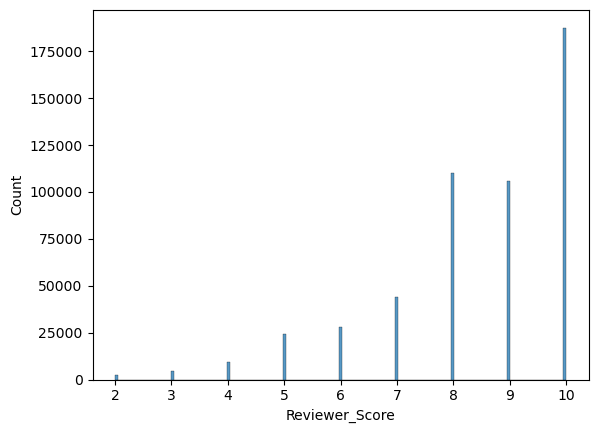

In [24]:
sns.histplot(data=hotel_df, x='Reviewer_Score')
plt.show()

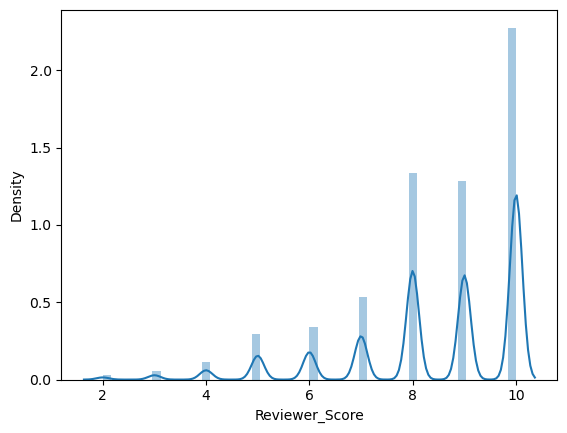

In [25]:
sns.distplot(hotel_df['Reviewer_Score'], kde=True)
plt.show()

- As we can see here, our distribution is **skewed left**. It seems that most people gave high score to the hotels they have stayed. Also, most of them even gave the highest score (9.5-10) and the mode of our distribution is 10. So, our distribution is **Left-Skewed Distribution**.
- Having high scores in this dataset can have so many reasons. Since our dataset have reviews from different hotels, maybe there are some hotels in our dataset that they got considerable number of positive reviews and high scores. Maybe since the number of reviews of these hotels are higher than other ones and they got really high scores, these good hotels made our data imbalance. This is just a hypothesis that we should check later on data.

### 1d

d. Given this will be a classification problem, what is a potential problem with this distribution?

Overall:

A potential problem with skewed distribution when dealing with a classification problem is that it can lead to imbalanced classes. If a dataset has a skewed distribution, it means that one class has more observations than the others.

In a classification problem, imbalanced classes can lead to a number of issues, such as:

Overfitting: If the model is trained on an imbalanced dataset, it may be too heavily influenced by the majority class, leading to overfitting. This means that the model will perform well on the training data but poorly on unseen data.

Bias: An imbalanced dataset can lead to a bias towards the majority class, making it difficult for the model to accurately predict the minority class.

Difficulties in identifying the under-represented class: In a skewed distribution, it is more likely to miss-classify the under-represented class.


In this dataset:

A potential problem with a left skewed distribution in this dataset is that it indicates a lack of negative reviews or low scores. This can be problematic because it may not provide an accurate representation of the hotels' overall performance and customer satisfaction. 

Additionally, it may lead to a false sense of security for potential customers, who may assume that the hotels are highly rated without considering any negative feedback. 

Finally, it may suggest that the dataset is not addressing or handling complaints properly or that it is not being transparent about their reviews.

## Question 2

2. This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?

In [26]:
data_types = hotel_df.dtypes
print(data_types)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                  int32
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [27]:
# Lists to store numeric and non-numeric column names
numeric_cols = []
non_numeric_cols = []

# Iterate through columns in dataset
for col in hotel_df.columns:
    # Check if column is of numeric type
    if hotel_df[col].dtype in ['int64', 'float64', 'int32']:
        numeric_cols.append(col)
    else:
        non_numeric_cols.append(col)

# Print numeric and non-numeric column names
print("Numeric Columns:", numeric_cols)
print()
print("Non-Numeric Columns:", non_numeric_cols)


Numeric Columns: ['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat', 'lng']

Non-Numeric Columns: ['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Tags', 'days_since_review']


- Here we have 9 numeric columns and 8 non-numeric columns. Now let's look at the dataset again to identify which of these 8 non-numeric columns can be transformed to numeric columns:

In [28]:
hotel_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,4,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


- Hotel_Address, Review_Date, Hotel_Name, Reviewer_Nationality, Negative_Review, Positive_Review, Tags, days_since_review are non-numeric columns. Let's get deep in each of them and check if we can change them to numeric columns and how we can do it:

1. Hotel_Address: 

In [29]:
unique_values = hotel_df['Hotel_Address'].nunique()
print(unique_values)

1493


Here we have almost 1500 different addresses. But if we look closer at the end of each address we have the country name. If we write a for loop and iterate through each row we can extract country names and if the number of them is not that high, we can change country column to numeric column with One-hot encoding or dummy variable methods. We will check this on Question 3.b. 

2. Review_Date:

Here the data type of Date column is object. We can convert it to date data type or even we can extract year, month and day from this column and create three new integer columns for Year, Month and day. However, datetime columns have specific characteristics that may need to be handled differently in a dataset. We will decide how to deal with this column on question 3.b. 

3. Hotel_Name:

In [30]:
unique_values = hotel_df['Hotel_Name'].nunique()
print(unique_values)

1492


Here again we have almost 1500 different hotel names and although we can still change it to numeric column with abovementioned methods, it does not seem a reasonable approach to convert this column to numeric column. 

4. Reviewer_Nationality:

In [31]:
unique_values = hotel_df['Reviewer_Nationality'].nunique()
print(unique_values)

227


Here we have 227 different values for reviewer nationality. Still it is considered a high number but if this column has significant value for predicting target value, we can change this column to numeric columns with Dummy variable or One-hot encoding methods. 

5. Negative_Review:

6. Positive_Review:

For positive and negative review columns, we cannot change them to numeric columns and the words and sentences in these reviews holds high value for our target column. Later with proper modeling we will extract significant words from these columns and predict our target column.

7. Tags:

Here as we can see this column contains a list of different tags in it. Let's see how many unique tags do we have in total in this column: ( Here I iterate through a for loop for tags in a list and then for list in each row for Tags column, and then I put them into a set to find out the unique values, because set does not accept repeated values.)

In [32]:
# number of unique tags in Tags column

# Use the unique function on the column to get a set of unique tags
unique_tags = set([tag for sublist in hotel_df['Tags'] for tag in sublist])

# Print the number of unique tags
print(len(unique_tags))

67


As we can see here, we have 67 different unique tags in Tags column. Here we can convert them to numeric columns with abovementioned methods. Important note here is that each row have so many different tags and here we are not creating sparse matrices like above columns. Here we are creating dense matrices and most of our elements are non-zero. Dense matrices take up more memory and require more computational resources to process. So, we should definitely keep an eye on it because maybe we can face ran-out-of-memory problems.

8. days_since_review:

This column has a number at the beggining and 'day' or 'days' words after that. We can easily use string manipulation techniques such as regular expressions or string split to extract the numeric value from the string of for example "27 day" and then convert it to a numeric data type such as integer. Since the number part of the string is at the beggining we can extract the first element from the tring easily.

- In this question we checked the numeric and non-numeric columns and figured out which one of the non-numeric ones are convertable. We will look further to this question and we will discuss converting them on question 3.b. 

# Part 2. Data Wrangling

## Question 3

3. Build the proper dataset separation (Optional but recommended: The dataset is actually too big to run quickly on most laptops. Feel free to sample ~10% of the data as your dataset from this point on. Make sure all classes are included in your subsample.)

- As it is recommended I am going to make a sample of 10% of the actual dataset. To make sure that all classes are included in my subsample, I am going to check the distribution of value counts of Reviewer_Score column of my actual dataset and my sample. I will also visualize this ditribution too. All classes here means all values of Reviewer_Score column with the same distribution.

In [33]:
# check the distribution of my actual dataset

hotel_df['Reviewer_Score'].value_counts()

10    187592
8     110035
9     105621
7      44041
6      27765
5      24152
4       9421
3       4393
2       2192
Name: Reviewer_Score, dtype: int64

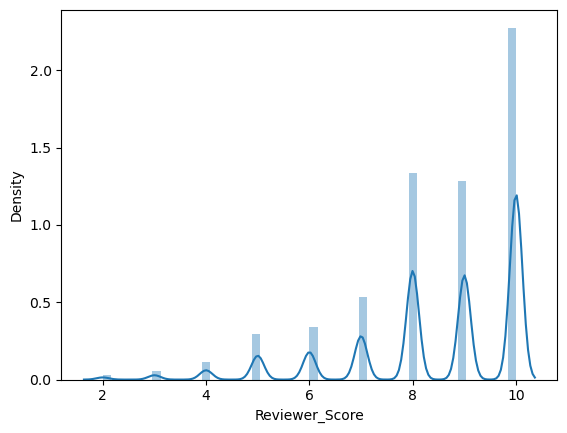

In [34]:
# Visualization of the distribution of the actual dataset

sns.distplot(hotel_df['Reviewer_Score'], kde=True)
plt.show()

- Now let's create our sample data with a fixed random_state number to get the same data everytime we run the cell:

In [35]:
# Create a new dataframe that have the same distribution of the Reviewer_Score column

sample_df = hotel_df.groupby(hotel_df['Reviewer_Score'], group_keys=True).apply(lambda x: x.sample(frac=0.1, random_state=17))
sample_df.reset_index(drop=True,inplace=True)

# Print the sampled dataframe
sample_df.head()


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,1 Addington Street Lambeth London SE1 7RY Unit...,1322,7/11/2017,8.4,Park Plaza County Hall London,Philippines,I discussed my grievance with the duty manage...,43,6117,NOTHING,2,39,2,"[' Leisure trip ', ' Couple ', ' Studio Double...",23 days,51.501400,-0.116009
1,45 Prescot Street City of London London E1 8GP...,531,4/12/2016,8.7,Grange Tower Bridge Hotel,United Kingdom,No Negative,0,1668,Staff stole money of me and they were very rude,11,2,2,"[' Leisure trip ', ' Couple ', ' Superior Doub...",478 day,51.511551,-0.071492
2,346 348 Edgware Road Westminster Borough Londo...,73,7/2/2016,6.6,Best Western Maitrise Hotel Edgware Road,United Kingdom,The receptionist didn t know what floor my ro...,84,461,No Positive,0,2,2,"[' Leisure trip ', ' Solo traveler ', ' Standa...",397 day,51.521148,-0.171346
3,146 Praed Street Westminster Borough London W2...,687,8/13/2015,8.2,Hilton London Paddington,United Kingdom,Cancelling my room very late Extremely rude o...,12,2898,No Positive,0,1,2,"[' Business trip ', ' Solo traveler ', ' Delux...",721 day,51.515632,-0.175737
4,17 18 Upper Woburn Place Camden London WC1H 0H...,198,7/6/2017,7.4,Hilton London Euston,United Kingdom,Poor customer service,4,843,Nothing,2,1,2,"[' Leisure trip ', ' Couple ', ' Double Guest ...",28 days,51.526519,-0.130369


In [36]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51520 entries, 0 to 51519
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               51520 non-null  object 
 1   Additional_Number_of_Scoring                51520 non-null  int64  
 2   Review_Date                                 51520 non-null  object 
 3   Average_Score                               51520 non-null  float64
 4   Hotel_Name                                  51520 non-null  object 
 5   Reviewer_Nationality                        51520 non-null  object 
 6   Negative_Review                             51520 non-null  object 
 7   Review_Total_Negative_Word_Counts           51520 non-null  int64  
 8   Total_Number_of_Reviews                     51520 non-null  int64  
 9   Positive_Review                             51520 non-null  object 
 10  Review_Tot

In [37]:
# Take a look at the shape of the sample dataset

print(f"The sample dataframe has {sample_df.shape[0]} rows and {sample_df.shape[1]} columns")

The sample dataframe has 51520 rows and 17 columns


- Our sample data frame has 10% amount of the rows of our actual dataset. Now let's look at the ditribution of the Reviewer_Score column and the visualization of it:

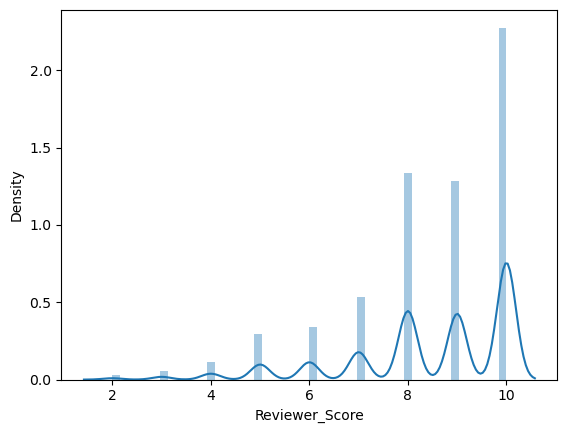

In [38]:
# Visualization of the Reviewer_Score column distribution of the sample dataset

sns.distplot(sample_df['Reviewer_Score'], kde=True)
plt.show()

In [39]:
# check and compare the distribution of my the sample dataset

sample_df['Reviewer_Score'].value_counts()

10    18759
8     11004
9     10562
7      4404
6      2776
5      2415
4       942
3       439
2       219
Name: Reviewer_Score, dtype: int64

In [40]:
# The actual dataset

hotel_df['Reviewer_Score'].value_counts()

10    187592
8     110035
9     105621
7      44041
6      27765
5      24152
4       9421
3       4393
2       2192
Name: Reviewer_Score, dtype: int64

- As we can see here, our sample dataset includes all classes of the Reviewer_Score column with same percentage of distribution. The sample dataset has exactly 10% of each review score from 2 to 10. From now on, we will work with our sample data. Now we can proceed to next questions:

### 3a

a. Convert the Reviewer_Score column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').

- Let's convert the target column of our sample data to a binary column:

In [41]:
sample_df['Reviewer_Score'] = sample_df['Reviewer_Score'].apply(lambda x: 1 if x >= 9 else 0)

In [42]:
sample_df['Reviewer_Score'].value_counts()

1    29321
0    22199
Name: Reviewer_Score, dtype: int64

- The distribution of the Reviewer_Score column is changed and now we have 1 (good) and 0 (not good) value for it. 

### 3b

b. Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review.

1. Hotel_Address: For this column we will extract country name and make a new column for it and then we will convert it to numerical with ohe method. We will drop Hotel_Address column after that: 

In [43]:
# Create new column to store last word of sentence

sample_df['Hotel_Country'] = ''

# Iterate through rows of dataset

for index, row in sample_df.iterrows():
    # Extract sentence from column
    sentence = row['Hotel_Address']
    # Split sentence into words
    words = sentence.split()
    # Get last word of sentence
    last_word = words[-1]
    # Add last word to new column
    sample_df.at[index, 'Hotel_Country'] = last_word

# Changing Kingdom with United Kingdom

sample_df.loc[sample_df['Hotel_Country'] == 'Kingdom', ['Hotel_Country']] = ['United Kingdom']

In [44]:
# Print the unique values for Hotel_Country column for updated dataset

sample_df['Hotel_Country'].value_counts()

United Kingdom    26207
France             6044
Spain              5921
Netherlands        5749
Austria            3932
Italy              3667
Name: Hotel_Country, dtype: int64

- So here we have 6 different countries that hotels are located in them. Now we can drop Hotel_Address column and convert Hotel_Country column to numeric columns with ohemethod:

In [45]:
sample_df = sample_df.drop("Hotel_Address", axis=1)
sample_df.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Hotel_Country
0,1322,7/11/2017,8.4,Park Plaza County Hall London,Philippines,I discussed my grievance with the duty manage...,43,6117,NOTHING,2,39,0,"[' Leisure trip ', ' Couple ', ' Studio Double...",23 days,51.501400,-0.116009,United Kingdom
1,531,4/12/2016,8.7,Grange Tower Bridge Hotel,United Kingdom,No Negative,0,1668,Staff stole money of me and they were very rude,11,2,0,"[' Leisure trip ', ' Couple ', ' Superior Doub...",478 day,51.511551,-0.071492,United Kingdom
2,73,7/2/2016,6.6,Best Western Maitrise Hotel Edgware Road,United Kingdom,The receptionist didn t know what floor my ro...,84,461,No Positive,0,2,0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",397 day,51.521148,-0.171346,United Kingdom
3,687,8/13/2015,8.2,Hilton London Paddington,United Kingdom,Cancelling my room very late Extremely rude o...,12,2898,No Positive,0,1,0,"[' Business trip ', ' Solo traveler ', ' Delux...",721 day,51.515632,-0.175737,United Kingdom
4,198,7/6/2017,7.4,Hilton London Euston,United Kingdom,Poor customer service,4,843,Nothing,2,1,0,"[' Leisure trip ', ' Couple ', ' Double Guest ...",28 days,51.526519,-0.130369,United Kingdom


- Now let's do the encoding with ohe:

In [46]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Fit and transform the Hotel_Country column
X_encoded = encoder.fit_transform(sample_df[['Hotel_Country']])

# Convert the encoded data to a DataFrame
df_encoded = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(['Hotel_Country']))

# Concatenate the encoded DataFrame with the original DataFrame
sample_df = pd.concat([sample_df, df_encoded], axis=1)

# Drop the original categorical column
sample_df = sample_df.drop('Hotel_Country', axis=1)


In [47]:
sample_df.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,...,Tags,days_since_review,lat,lng,Hotel_Country_Austria,Hotel_Country_France,Hotel_Country_Italy,Hotel_Country_Netherlands,Hotel_Country_Spain,Hotel_Country_United Kingdom
0,1322,7/11/2017,8.4,Park Plaza County Hall London,Philippines,I discussed my grievance with the duty manage...,43,6117,NOTHING,2,...,"[' Leisure trip ', ' Couple ', ' Studio Double...",23 days,51.501400,-0.116009,0.0,0.0,0.0,0.0,0.0,1.0
1,531,4/12/2016,8.7,Grange Tower Bridge Hotel,United Kingdom,No Negative,0,1668,Staff stole money of me and they were very rude,11,...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",478 day,51.511551,-0.071492,0.0,0.0,0.0,0.0,0.0,1.0
2,73,7/2/2016,6.6,Best Western Maitrise Hotel Edgware Road,United Kingdom,The receptionist didn t know what floor my ro...,84,461,No Positive,0,...,"[' Leisure trip ', ' Solo traveler ', ' Standa...",397 day,51.521148,-0.171346,0.0,0.0,0.0,0.0,0.0,1.0
3,687,8/13/2015,8.2,Hilton London Paddington,United Kingdom,Cancelling my room very late Extremely rude o...,12,2898,No Positive,0,...,"[' Business trip ', ' Solo traveler ', ' Delux...",721 day,51.515632,-0.175737,0.0,0.0,0.0,0.0,0.0,1.0
4,198,7/6/2017,7.4,Hilton London Euston,United Kingdom,Poor customer service,4,843,Nothing,2,...,"[' Leisure trip ', ' Couple ', ' Double Guest ...",28 days,51.526519,-0.130369,0.0,0.0,0.0,0.0,0.0,1.0


- Now we successfully convert our hotel_country column to numeric columns with ohe method.

2. Review_Date: This column has object data type too. Since here we want numeric columns, datetime data type is not appropriate for us. So first I will convert it to date time data type and then I will extract day, month and year from it and create 3 new columns with numeric data type:

In [48]:
#Convert date column to datetime

sample_df['Review_Date'] = pd.to_datetime(sample_df['Review_Date'])

#extract year, month, day, day of the week from date column

sample_df['Year'] = sample_df['Review_Date'].dt.year
sample_df['Month'] = sample_df['Review_Date'].dt.month
sample_df['Day'] = sample_df['Review_Date'].dt.day

# Drop Review_Date column

sample_df = sample_df.drop('Review_Date', axis=1)

In [49]:
sample_df.head()

,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,...,lng,Hotel_Country_Austria,Hotel_Country_France,Hotel_Country_Italy,Hotel_Country_Netherlands,Hotel_Country_Spain,Hotel_Country_United Kingdom,Year,Month,Day
0,1322,8.4,Park Plaza County Hall London,Philippines,I discussed my grievance with the duty manage...,43,6117,NOTHING,2,39,...,-0.116009,0.0,0.0,0.0,0.0,0.0,1.0,2017,7,11
1,531,8.7,Grange Tower Bridge Hotel,United Kingdom,No Negative,0,1668,Staff stole money of me and they were very rude,11,2,...,-0.071492,0.0,0.0,0.0,0.0,0.0,1.0,2016,4,12
2,73,6.6,Best Western Maitrise Hotel Edgware Road,United Kingdom,The receptionist didn t know what floor my ro...,84,461,No Positive,0,2,...,-0.171346,0.0,0.0,0.0,0.0,0.0,1.0,2016,7,2
3,687,8.2,Hilton London Paddington,United Kingdom,Cancelling my room very late Extremely rude o...,12,2898,No Positive,0,1,...,-0.175737,0.0,0.0,0.0,0.0,0.0,1.0,2015,8,13
4,198,7.4,Hilton London Euston,United Kingdom,Poor customer service,4,843,Nothing,2,1,...,-0.130369,0.0,0.0,0.0,0.0,0.0,1.0,2017,7,6


- Now we create numeric columns of Year, Month and day from Review_Date column and we  drop Review_Date column at the end.

3. Hotel_Name: This column had 1500 different unique values. Although we can change to numeric columns with ohe, there would be so many sparse matrices so it is better to drop it now:

In [50]:
sample_df = sample_df.drop('Hotel_Name', axis=1)

4. Reviewer_Nationality:

In [51]:
unique_values = sample_df['Reviewer_Nationality'].nunique()
print(unique_values)

182


- This column now have 182 different values (countries), again we can do ohe but we will create a lot of sparse matrices, so it is better to drop it:

In [52]:
sample_df = sample_df.drop('Reviewer_Nationality', axis=1)

- 5,6. Negative_Review and Positive_Review: As it was mentioned in this question, we will keep these two columns with no change.

7. Tags:

In [53]:
# Assume the DataFrame is called "data" and the column you want to convert to a list is called "tags"
# tags_column = sample_df['Tags'].tolist()
tags_column = sample_df['Tags'].values.tolist()

tags_column

["[' Leisure trip ', ' Couple ', ' Studio Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']",
 "[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']",
 "[' Leisure trip ', ' Solo traveler ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']",
 "[' Business trip ', ' Solo traveler ', ' Deluxe Double Room ', ' Stayed 1 night ']",
 "[' Leisure trip ', ' Couple ', ' Double Guest Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']",
 "[' Leisure trip ', ' Solo traveler ', ' Standard Twin Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']",
 "[' Business trip ', ' Solo traveler ', ' Twin Room ', ' Stayed 1 night ']",
 "[' Leisure trip ', ' Family with young children ', ' Superior Queen Room ', ' Stayed 11 nights ', ' Submitted from a mobile device ']",
 "[' Leisure trip ', ' Family with young children ', ' Superior King Room with Lounge Access ', ' Stayed

- Below the code to convert tags to columns can be found but this will cause so many sparse matrices again and I get run out of memory error. So I decided to drop Tags column too:

In [54]:
sample_df = sample_df.drop('Tags', axis=1)

8. days_since_review: As we said earlier we can convert this column to numeric by extracting the beggining number and change it to integer type as follows:

In [55]:
# Create new column to store last word of sentence
sample_df['Days_Since_Review'] = ''

# Iterate through rows of dataset
for index, row in sample_df.iterrows():
    # Extract sentence from column
    sentence = row['days_since_review']
    # Split sentence into words
    words = sentence.split()
    # Get last word of sentence
    last_word = words[0]
    # Add last word to new column
    sample_df.at[index, 'Days_Since_Review'] = last_word
    
sample_df['Days_Since_Review'] = sample_df['Days_Since_Review'].apply(lambda x: int(x))

- Now that we have splitted 'day' and 'days' from the column and convert the numbers to integers and put the in Days_Since_Review column, We can drop the column:

In [56]:
sample_df = sample_df.drop('days_since_review', axis=1)

- Now that we have converted all of our data to numeric columns except positive and negative review, let's look at the sample dataset data types:

In [57]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51520 entries, 0 to 51519
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Additional_Number_of_Scoring                51520 non-null  int64  
 1   Average_Score                               51520 non-null  float64
 2   Negative_Review                             51520 non-null  object 
 3   Review_Total_Negative_Word_Counts           51520 non-null  int64  
 4   Total_Number_of_Reviews                     51520 non-null  int64  
 5   Positive_Review                             51520 non-null  object 
 6   Review_Total_Positive_Word_Counts           51520 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  51520 non-null  int64  
 8   Reviewer_Score                              51520 non-null  int64  
 9   lat                                         51520 non-null  float64
 10  lng       

- So we have 21 columns and from 6 non-numeric columns ( without positive_review and negative_review columns that we should keep them as they are) that we can convert to numeric, I converted 3 of them ( Hotel_Address, Review_Date, days_since_review). I could still convert other three but I would face run memory error. So I forced to drop them.

### 3c

c. Split the data into train and test sets. 

- Often, we want to ensure the same proportion is represented in both the train and test subsets. This can be achieved by setting stratify = Target column. Without this, the proportions may be quite different; in a small dataset, one class might not even feature in one of the subsets.

- Also, the data points get shuffled and then distributed randomly to the train and test sets. Using the random_state parameter ensures we get reproducible results.

In [58]:
# Split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(sample_df.drop('Reviewer_Score', axis=1),
                                                    sample_df['Reviewer_Score'], 
                                                    test_size=0.2, 
                                                    stratify=sample_df['Reviewer_Score'], 
                                                    random_state=17)

In [59]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41216 entries, 21459 to 26081
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Additional_Number_of_Scoring                41216 non-null  int64  
 1   Average_Score                               41216 non-null  float64
 2   Negative_Review                             41216 non-null  object 
 3   Review_Total_Negative_Word_Counts           41216 non-null  int64  
 4   Total_Number_of_Reviews                     41216 non-null  int64  
 5   Positive_Review                             41216 non-null  object 
 6   Review_Total_Positive_Word_Counts           41216 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  41216 non-null  int64  
 8   lat                                         41216 non-null  float64
 9   lng                                         41216 non-null  float64
 10  Hotel_

- Now our data is splitted into train and test sets with stratify of target column and a random state of 17. Our train set has 80% and test set has 20% of our sample. 

### 3d

d. Use a count vectorizer to combine Positive_Review and Negative_Review with the numeric data (notice that this is done AFTER the train/test split). You should vectorize each column separately, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). You may have to adjust the min_df parameter.

- To use a CountVectorizer() to combine Positive_Review and Negative_Review with the numeric data, we should first perform a train/test split on the data. Once the split is done, we can use the CountVectorizer() to create sparse matrices for the Positive_Review and Negative_Review columns separately. Then, we should set the min_df parameter to a suitable value, depending on the size of our sample dataset which here it can be 5. Once we have the sparse matrices for the text data, we can use the scipy.sparse.hstack() function to horizontally stack the numeric data matrix, positive matrix, and negative matrix together to create a single combined matrix.

- First, I will do the process for the train data ( X_train ):

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack


# extract numeric columns

numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# extract positive and negative review columns

positive_review = X_train['Positive_Review']
negative_review = X_train['Negative_Review']

# create count vectorizer for positive and negative reviews

vectorizer = CountVectorizer(min_df=5)
positive_matrix = vectorizer.fit_transform(positive_review)
negative_matrix = vectorizer.fit_transform(negative_review)

# extract numeric data

numeric_data = X_train[numeric_cols]

# Combine sparse matrixes and numeric data

final_X_train = hstack((numeric_data, positive_matrix, negative_matrix))

- Now, I will do the process for the test data ( X_test ) but this time I will not use vectorizer.fit_transform() and I will only use vectorizer.transform() since we only do the fitting model for the train dataset:

In [61]:
# repeat the same process for testing data

numeric_cols = X_test.select_dtypes(include=['int64', 'float64']).columns
positive_review = X_test['Positive_Review']
negative_review = X_test['Negative_Review']
positive_matrix = vectorizer.transform(positive_review)
negative_matrix = vectorizer.transform(negative_review)
numeric_data = X_test[numeric_cols]

final_X_test = hstack((numeric_data, positive_matrix, negative_matrix))


Now the final_X_train and final_X_test datasets are ready and we can start the modeling in the next deliverable (NLP2).

### 3e

e. What does the min_df parameter do?

- The min_df parameter is used in the CountVectorizer class from the sklearn.feature_extraction.text module in Python. It is used to specify the minimum number of documents (or samples) in which a word should appear in order to be included in the vocabulary.


- When creating a document-term matrix (DTM) using the CountVectorizer, words that appear in only a few documents may not be useful for building a model. The min_df parameter allows you to specify a threshold for the minimum number of documents in which a word should appear before it is included in the vocabulary.


- For example, if min_df is set to 4, any word that appears in fewer than 4 documents will be ignored. This can be useful for reducing the dimensionality of the DTM and removing noise from the data.


- Additionally, when working with large datasets, you may want to set min_df to a higher value to reduce the size of the DTM, which can improve the performance of your model. It is also important to note that, if the min_df is set to a high value, it will remove the words that are unique to the document, which will lead to removing words that can be important for the classification task.


- It is worth to mention that, min_df could also be set as a float, in that case it will be interpreted as a proportion of documents, instead of an absolute number.